In [106]:
import numpy as np
import pandas as pd
import plotly.express as px

## ARIMA

In [107]:
df = pd.read_csv("Temp_Data.csv", index_col = "DATE", parse_dates=True)

In [108]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [109]:
df.index.freq = 'D'

In [110]:
df.dropna(inplace=True)

In [111]:
df.shape

(524, 4)

In [112]:
df = pd.DataFrame(df["Temp"])

In [113]:
df.head()

,Temp
DATE,
2020-01-01,-0.44
2020-01-02,-0.09
2020-01-03,2.95
2020-01-04,-0.80
2020-01-05,-7.95


In [114]:
px.line(df, x = df.index, y = "Temp")

In [115]:
train = df.iloc[:510,0]

In [116]:
test = df.iloc[510:,0]

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
decomp_results = seasonal_decompose(df)

<Axes: xlabel='DATE', ylabel='Resid'>

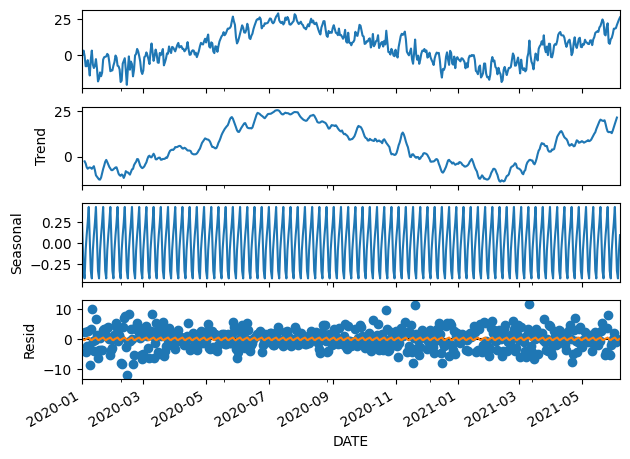

In [119]:
decomp_results.plot()
decomp_results.seasonal.plot()

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_ccf

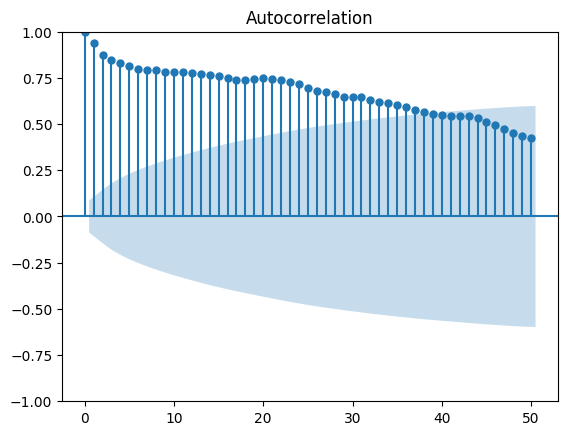

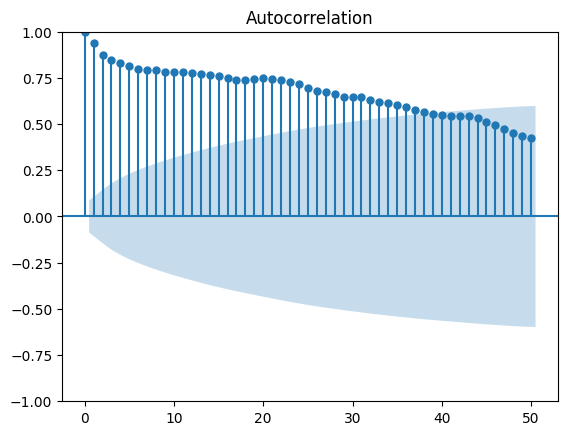

In [121]:
plot_acf(train, lags = 50)

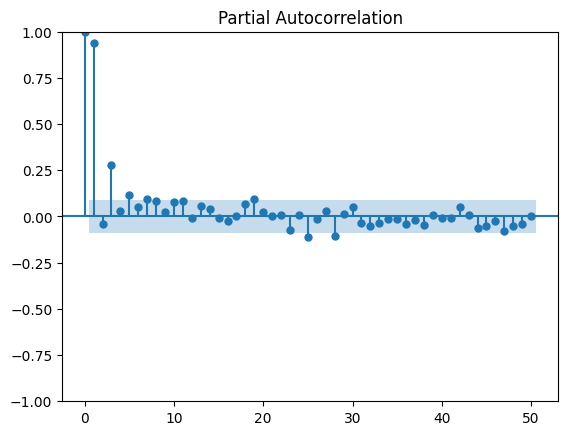

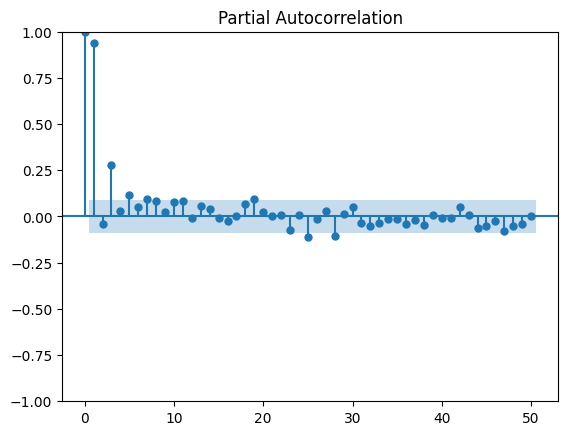

In [122]:
plot_pacf(train, lags=50)

In [123]:
from pmdarima import auto_arima

In [124]:
auto_arima(train, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2767.719, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2847.678, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2849.660, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2849.629, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2845.703, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2766.745, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2776.795, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2801.241, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2767.773, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2769.813, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2777.888, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2769.689, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2765.341, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2775.083, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [125]:
from statsmodels.tsa.arima.model import ARIMA

In [126]:
a_model = ARIMA(train, order = (1,1,2))

In [127]:
predictor = a_model.fit()

In [128]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Mon, 18 Mar 2024   AIC                           2765.341
Time:                        14:22:22   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.000      -0.490      -0.311
sigma2        13.1715      0.809     16.284      0.000      11.586      14.757
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
predicted_results = predictor.predict(start=len(train), end = len(train)+len(test) - 1)

In [130]:
import matplotlib.pyplot as plt

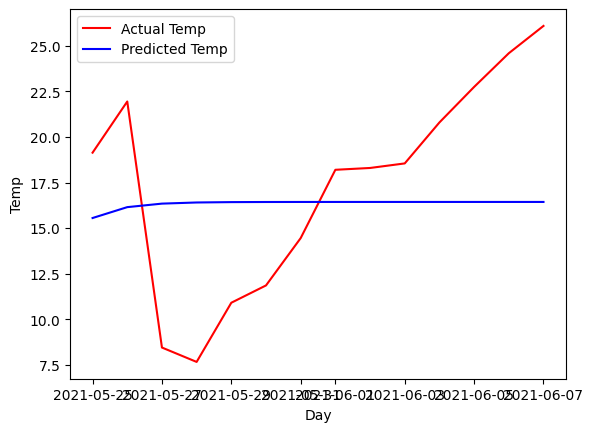

In [131]:
plt.plot(test, color = 'red', label = "Actual Temp")
plt.plot(predicted_results, color = 'blue', label = "Predicted Temp")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.legend()
plt.show()

In [132]:
import math
from sklearn.metrics import mean_squared_error

In [133]:

rmse = math.sqrt(mean_squared_error(test,predicted_results))

In [134]:
rmse

5.801290349770297

## SARIMAX

In [135]:
df = pd.read_csv("Temp_Data.csv", index_col = "DATE", parse_dates=True)
df.index.freq = 'D'
df.dropna(inplace=True)
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [136]:
df.corr()

,Temp,relative_humidity,wind_speed,Pressure
Temp,1.000000,-0.153565,-0.122811,-0.320442
relative_humidity,-0.153565,1.000000,-0.067022,-0.316668
wind_speed,-0.122811,-0.067022,1.000000,-0.305859
Pressure,-0.320442,-0.316668,-0.305859,1.000000


In [137]:
import seaborn as sns

<Axes: >

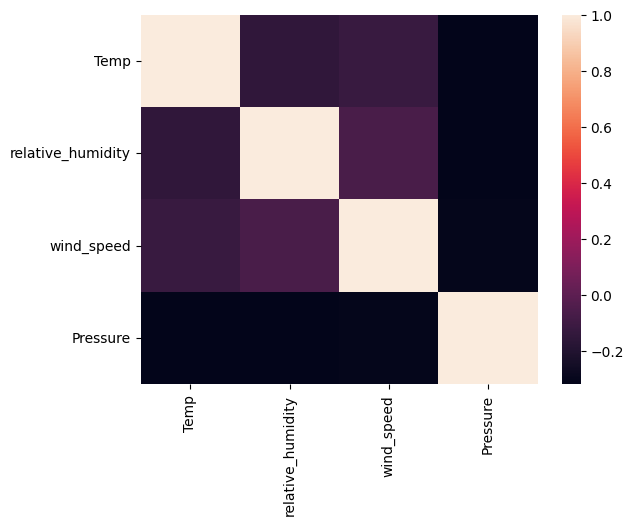

In [138]:
sns.heatmap(df.corr())

In [139]:
train = df.iloc[:510,0]

In [140]:
test = df.iloc[510:,0]

In [141]:
exo = df.iloc[:,1:]

In [142]:
train_exo = exo.iloc[:510]
test_exo  = exo.iloc[510:]

In [143]:
from pmdarima import auto_arima

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
decomp_results = seasonal_decompose(df['Temp'])

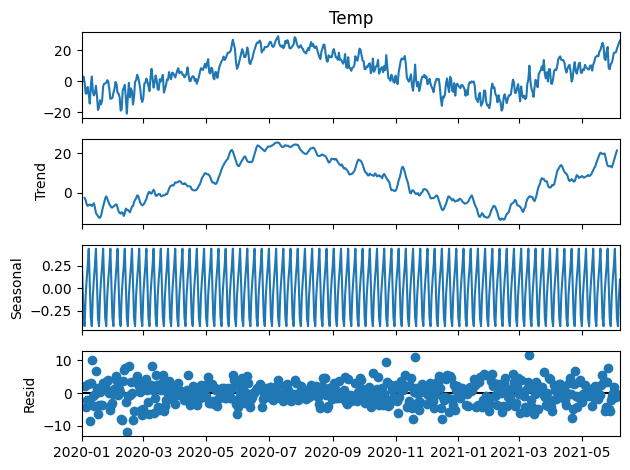

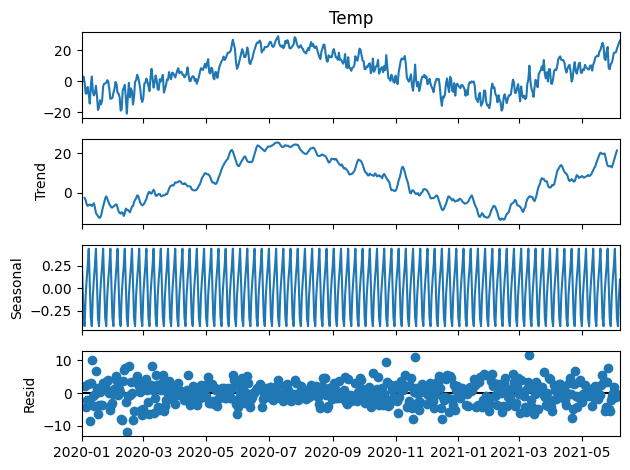

In [146]:
decomp_results.plot()

In [149]:
m = 9

In [150]:

auto_arima(df["Temp"], exogenous = exo, m = m, trace=True, D = 1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[9] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,0,0)(0,1,0)[9] intercept   : AIC=3490.797, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[9] intercept   : AIC=3044.120, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[9] intercept   : AIC=3060.800, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[9]             : AIC=3490.570, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[9] intercept   : AIC=3164.541, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[9] intercept   : AIC=2968.755, Time=0.86 sec
 ARIMA(1,0,0)(2,1,1)[9] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,0,0)(1,1,1)[9] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(2,1,0)[9] intercept   : AIC=3381.699, Time=0.99 sec
 ARIMA(2,0,0)(2,1,0)[9] intercept   : AIC=2953.463, Time=1.39 sec
 ARIMA(2,0,0)(1,1,0)[9] intercept   : AIC=3024.879, Time=0.39 sec
 ARIMA(2,0,0)(2,1,1)[9] intercept   : AIC=2911.345, Time=2.27 sec
 ARIMA(2,0,0)(1,1,1)[9] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,0,0)(2,1,2)[9] intercept   : AIC=inf, Time=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  524
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 9)   Log Likelihood               -1448.373
Date:                           Mon, 18 Mar 2024   AIC                           2908.745
Time:                                   14:24:59   BIC                           2934.210
Sample:                               01-01-2020   HQIC                          2918.725
                                    - 06-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9304      0.020     46.441      0.000       0.891       0.970
ma.L1          0.1040      0.044      2.370      0.018       0.018       0.190
ar.S.L9       -0.0407      0.045     -0.901      0.367      -0.129       0.048
ar.S.L18      -0.1067      0.051     -2.082      0.037      -0.207      -0.006
ma.S.L9       -0.9065      0.030    -29.821      0.000      -0.966      -0.847
sigma2        15.6521      1.009     15.507      0.000      13.674      17.630
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 9.07
Prob(Q):                              0.50   Prob(JB):                         0.01
Heteroskedasticity (H):               1.01   Skew:                            -0.31
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
p = 1
d = 0
q = 1
P = 2
D = 1
Q = 1

In [152]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [153]:
model = SARIMAX(train, exog = train_exo, order = (p,q,d), seasonal_order= (P,D,Q,m))

In [154]:
Model = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70966D+00    |proj g|=  8.10764D-02

At iterate    5    f=  2.61255D+00    |proj g|=  1.16248D-01

At iterate   10    f=  2.58924D+00    |proj g|=  5.36118D-02

At iterate   15    f=  2.57674D+00    |proj g|=  2.37924D-02

At iterate   20    f=  2.57525D+00    |proj g|=  7.46370D-03

At iterate   25    f=  2.57517D+00    |proj g|=  2.60326D-03

At iterate   30    f=  2.57512D+00    |proj g|=  4.90393D-03

At iterate   35    f=  2.57509D+00    |proj g|=  1.19193D-03

At iterate   40    f=  2.57508D+00    |proj g|=  3.94905D-04

At iterate   45    f=  2.57508D+00    |proj g|=  2.18199D-04

At iterate   50    f=  2.57508D+00    |proj g|=  5.55778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/victornoc/miniconda3/envs/mlflow/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [155]:
prediction = Model.predict(len(train), len(train) + len(test) -1, exog = test_exo, typ = "levels")

/home/victornoc/miniconda3/envs/mlflow/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



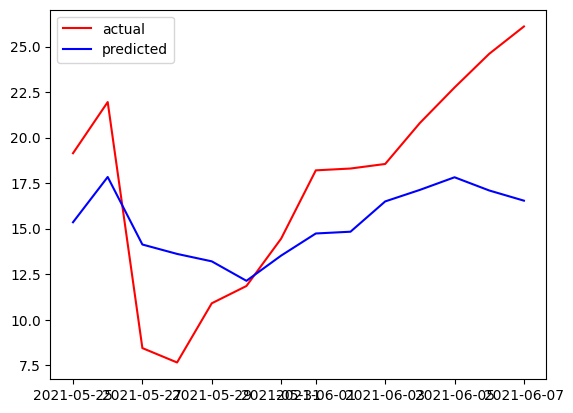

In [156]:
plt.plot(test, color = "red", label = "actual")
plt.plot(prediction, color = "blue", label = "predicted")
plt.legend()
plt.show()

In [157]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test,prediction))
rmse

4.776006283926218